#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Data Processing

In [ ]:
df = pd.read_excel("/content/modified_test_dataset.xlsx")
df.head()

,Prime,Gender,Age,Birth_date,Legal_retirement,Start_date,Tenure_x,Education_level,Job_satisfaction,Stress_level,Financial_readiness,Primary_caregiver,Overall_health,weight,ER_Intention
0,1,0,54,1969,2034,1992,31,3,3,2,2,0,3,0.025862,0
1,1,0,54,1969,2034,1992,31,4,2,3,3,0,2,0.025862,0
2,1,0,29,1994,2059,2021,2,4,3,3,2,0,3,0.129310,1
3,1,0,29,1994,2059,2021,2,3,3,2,2,1,3,0.129310,0
4,1,0,42,1981,2046,2009,14,3,5,1,4,0,4,0.043103,0


In [ ]:
len(df)

181

In [ ]:
cols = df.columns.tolist()
cols

['Prime',
 'Gender',
 'Age',
 'Birth_date',
 'Legal_retirement',
 'Start_date',
 'Tenure_x',
 'Education_level',
 'Job_satisfaction',
 'Stress_level',
 'Financial_readiness',
 'Primary_caregiver',
 'Overall_health',
 'weight',
 'ER_Intention']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Prime                181 non-null    int64  
 1   Gender               181 non-null    int64  
 2   Age                  181 non-null    int64  
 3   Birth_date           181 non-null    int64  
 4   Legal_retirement     181 non-null    int64  
 5   Start_date           181 non-null    int64  
 6   Tenure_x             181 non-null    int64  
 7   Education_level      181 non-null    int64  
 8   Job_satisfaction     181 non-null    int64  
 9   Stress_level         181 non-null    int64  
 10  Financial_readiness  181 non-null    int64  
 11  Primary_caregiver    181 non-null    int64  
 12  Overall_health       181 non-null    int64  
 13  weight               181 non-null    float64
 14  ER_Intention         181 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 2

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["ER_Intention"]==1][label], color = 'blue', label = 'early retirement', alpha = 0.7, density = True, stacked=True)
  plt.hist(df[df["ER_Intention"]==0][label], color = 'red', label = 'working', alpha = 0.7, density = True, stacked=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

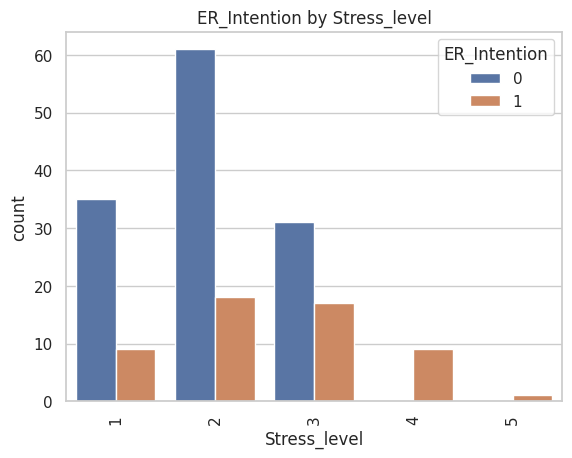

In [ ]:
label= 'Stress_level'
sns.countplot(x=label, hue='ER_Intention', data=df)
plt.title('ER_Intention by ' + label)
plt.xticks(rotation=90)
plt.show()

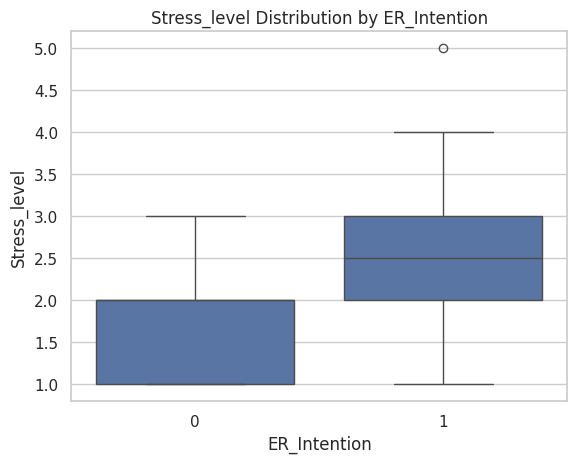

In [ ]:
label= 'Stress_level'
sns.boxplot(x='ER_Intention', y=label, data=df)
plt.title(f'{label} Distribution by ER_Intention')
plt.show()

<ipython-input-21-fe147a3c6790>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="ER_Intention", y="Job_satisfaction", data=df, palette="muted")


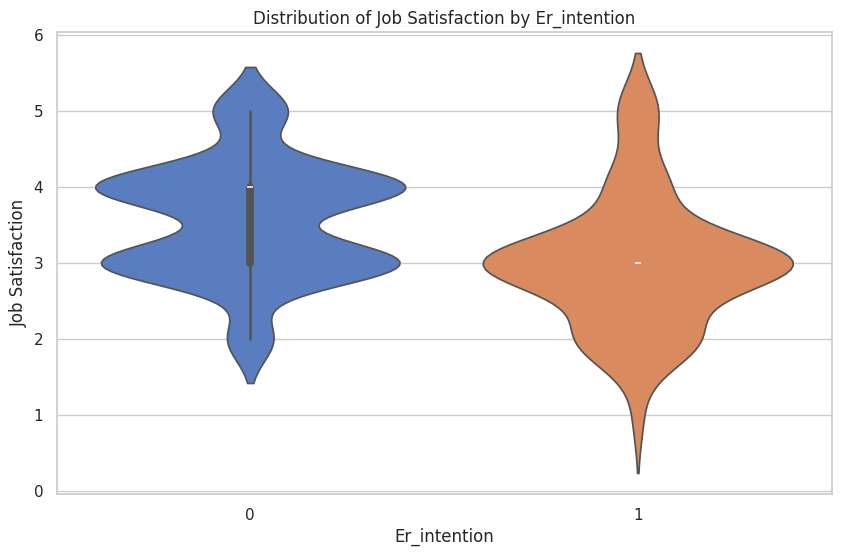

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x="ER_Intention", y="Job_satisfaction", data=df, palette="muted")
plt.xlabel("Er_intention")
plt.ylabel("Job Satisfaction")
plt.title("Distribution of Job Satisfaction by Er_intention")
plt.show()

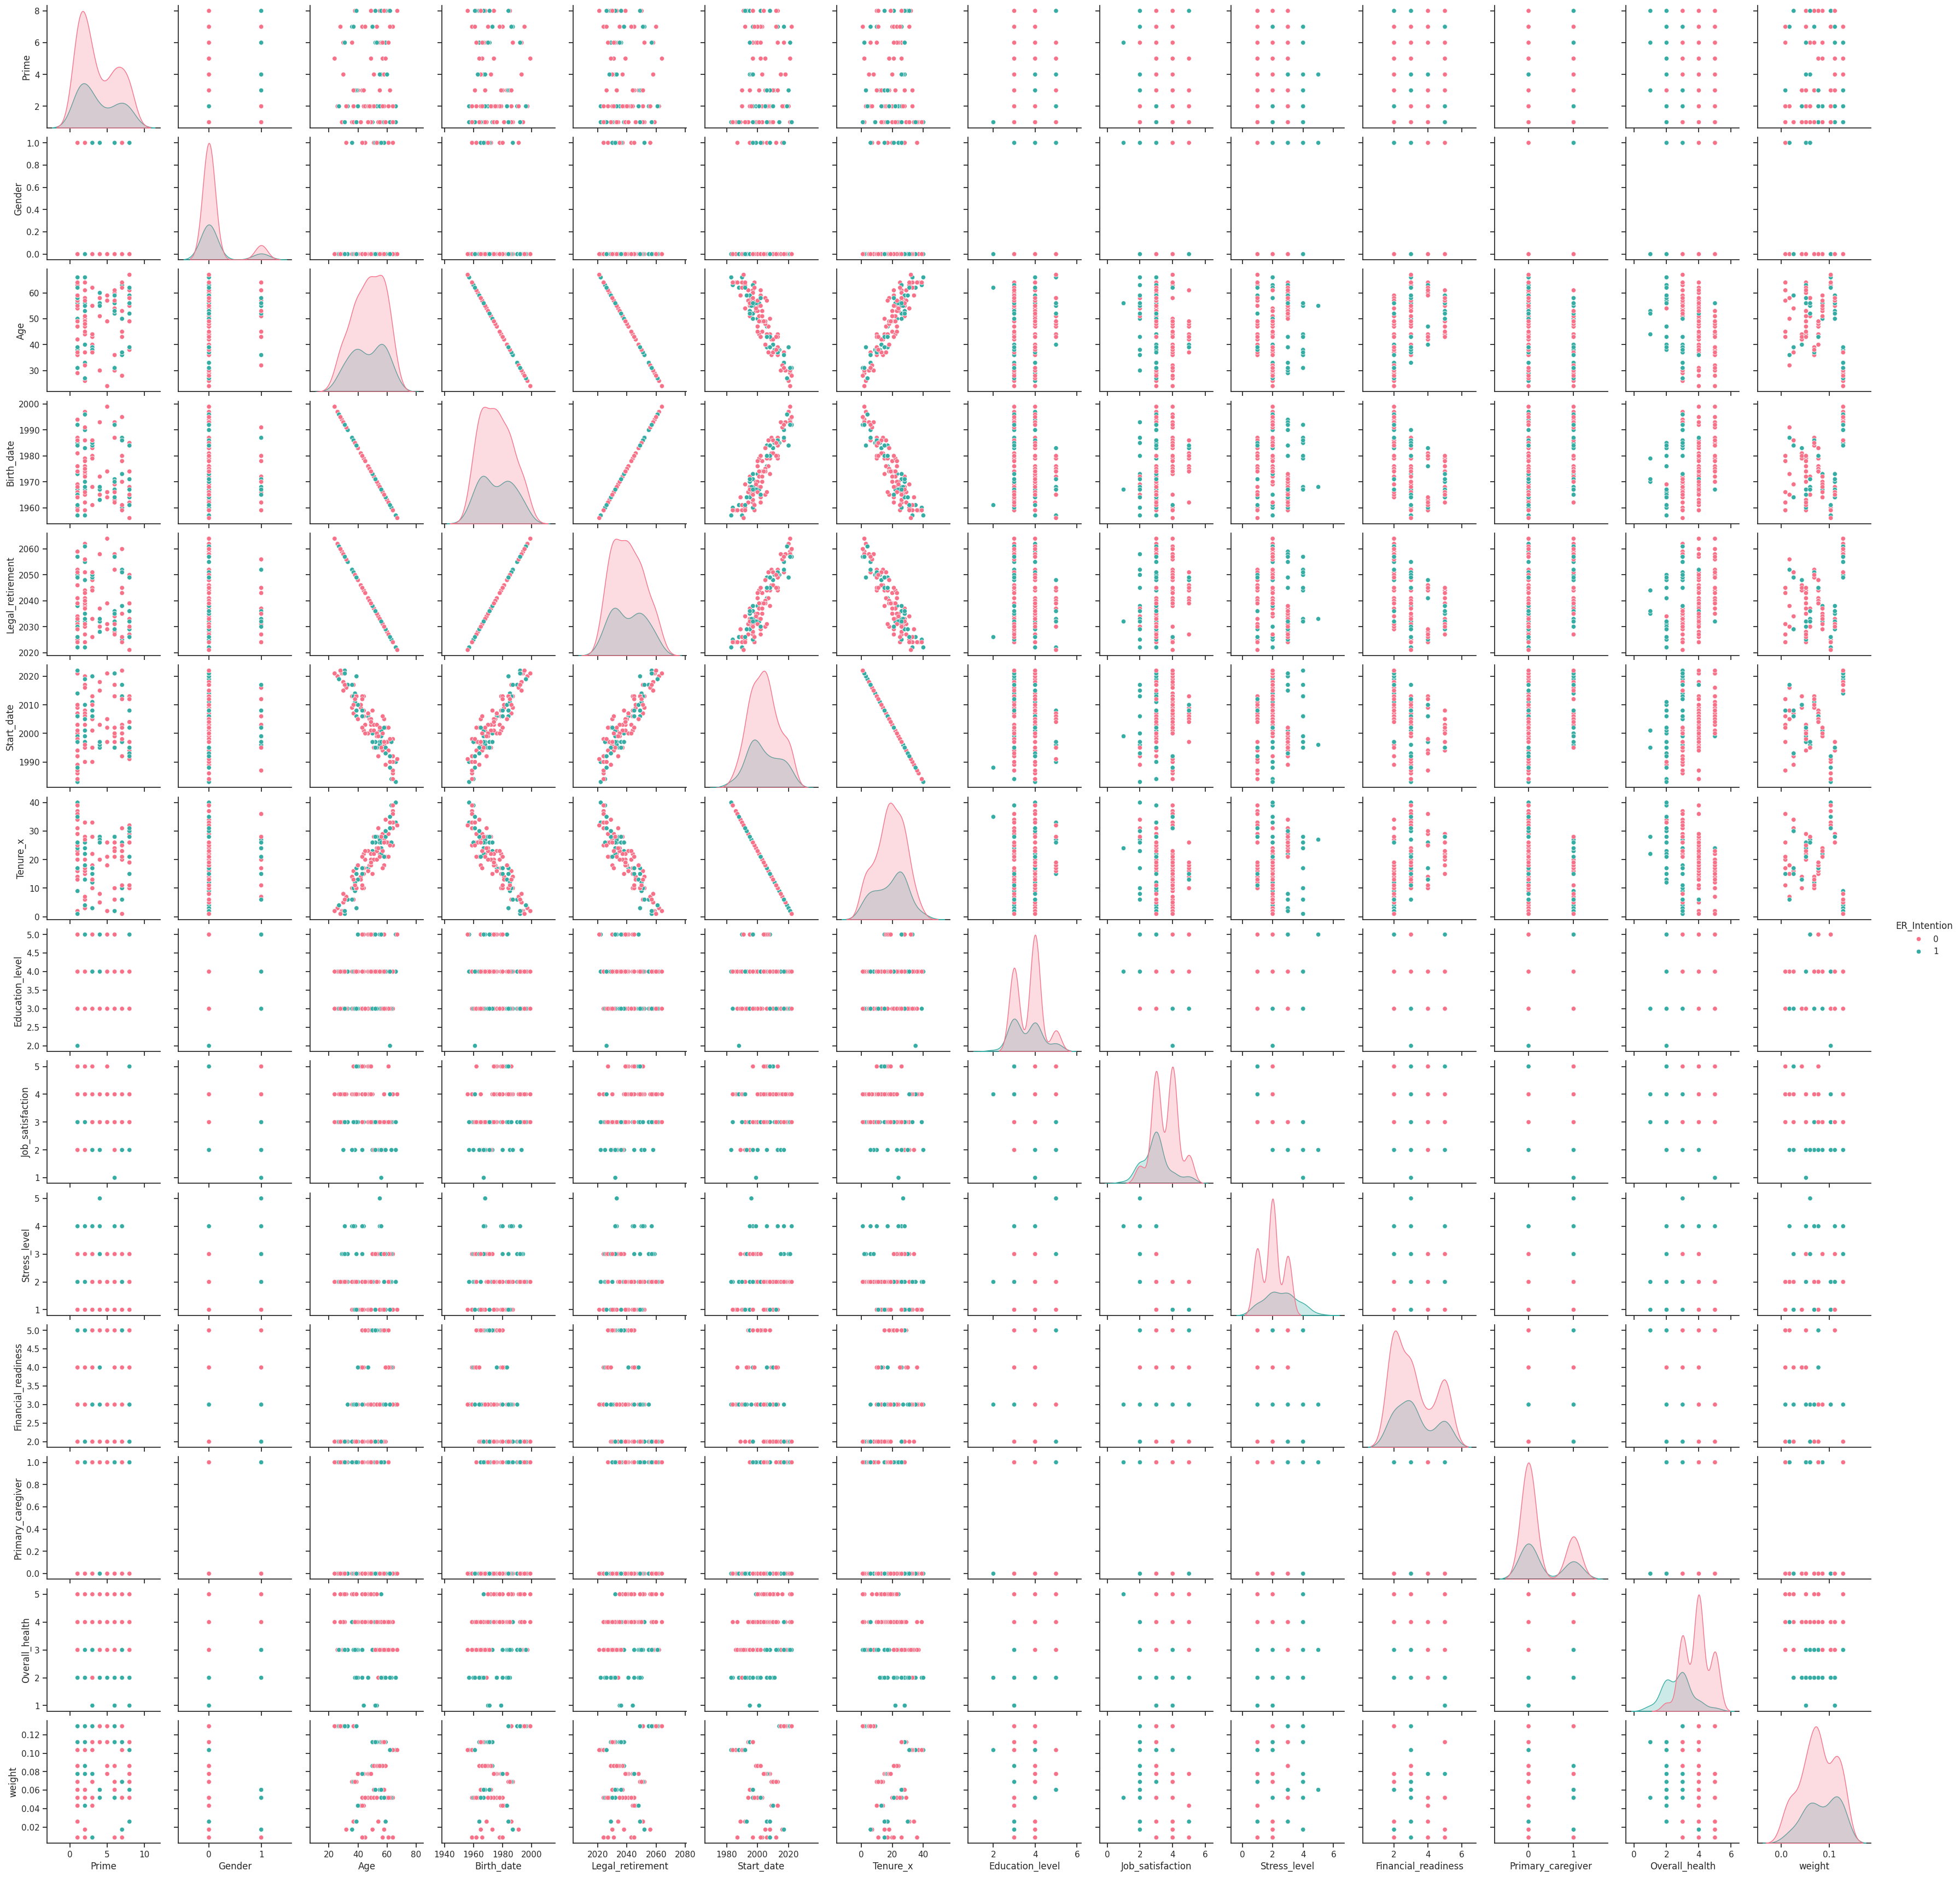

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="ER_Intention", palette="husl")
plt.show()

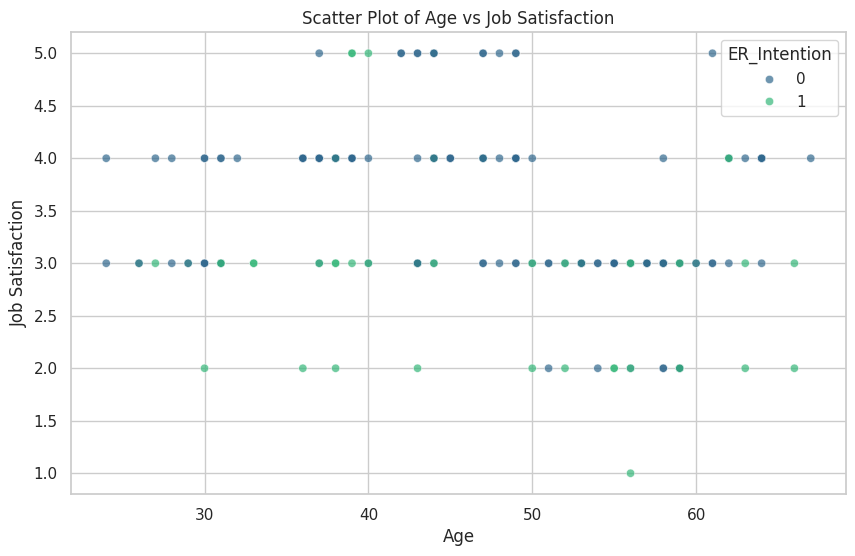

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Job_satisfaction", hue="ER_Intention", data=df, palette="viridis", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Job Satisfaction")
plt.title("Scatter Plot of Age vs Job Satisfaction")
plt.show()

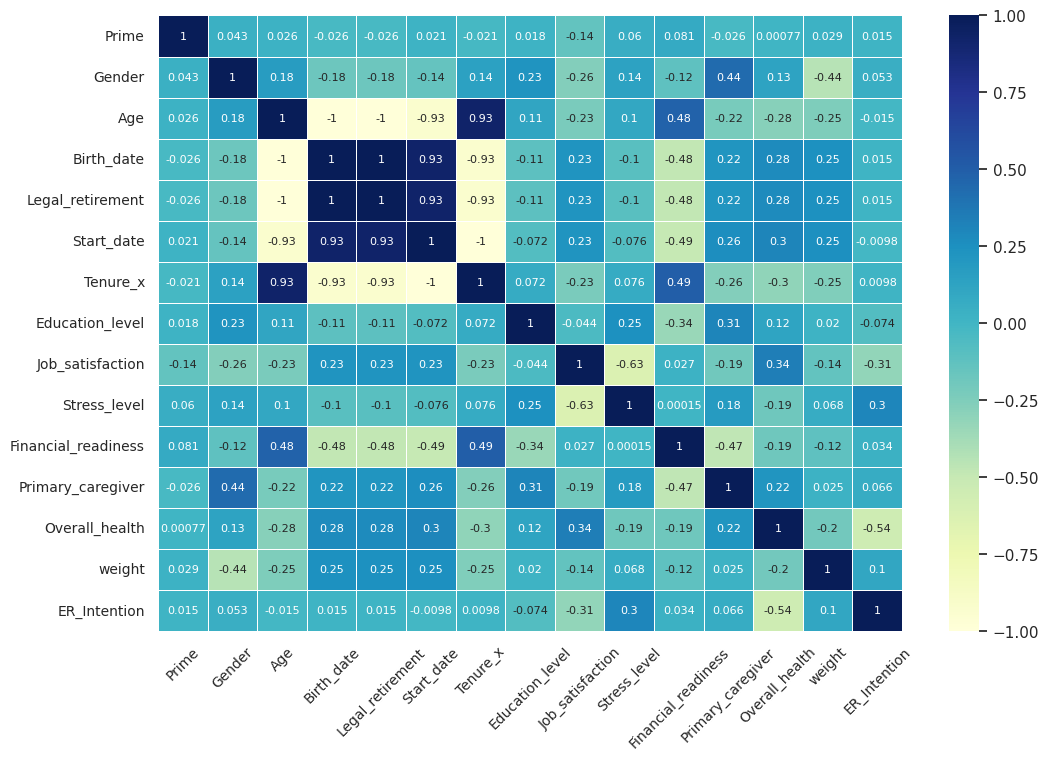

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", annot_kws={'fontsize': 8}, linewidths=0.5)
plt.xticks(rotation=45)
plt.tick_params(axis='both', labelsize=10)
plt.show()

#Train, Validation and Testing


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

80% -> train

test, validation -> 10%

In [ ]:
def scale_dataset(dataframe, oversample = False):
  Y = dataframe[dataframe.columns[-1]].values
  X = dataframe[dataframe.columns[:-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)

  data = np.hstack((X, np.reshape(Y, (-1,1))))

  return data, X , Y

Normalising dataset values ranges in "scale_datatset"

In [ ]:
len(test)

19

In [ ]:
test


,Prime,Gender,Age,Birth_date,Legal_retirement,Start_date,Tenure_x,Education_level,Job_satisfaction,Stress_level,Financial_readiness,Primary_caregiver,Overall_health,weight,ER_Intention
53,2,0,44,1979,2044,2006,17,4,4,1,3,0,4,0.077586,0
43,2,0,44,1979,2044,2008,15,5,5,2,5,1,5,0.077586,1
107,4,1,55,1968,2033,1996,27,5,2,5,3,1,3,0.060345,1
61,2,0,26,1997,2062,2020,3,3,3,2,2,1,3,0.129310,0
28,1,1,64,1959,2024,1987,36,3,4,1,4,0,3,0.008621,0
77,2,0,48,1975,2040,2005,18,4,3,2,2,1,4,0.077586,0
142,6,0,36,1987,2052,2013,10,4,4,2,2,0,4,0.068966,0
58,2,0,51,1972,2037,2001,22,4,3,3,3,0,3,0.086207,0
134,6,0,30,1993,2058,2021,2,4,4,2,2,0,5,0.129310,0
143,6,0,61,1962,2027,2002,21,4,3,2,5,0,3,0.008621,0


In [ ]:
print(len(train[train["ER_Intention"]==1])) #retired
print(len(train[train["ER_Intention"]==0])) #working

44
100


In [ ]:
train, X_train, Y_train = scale_dataset(train, oversample = True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample = False)
test, X_test, Y_test = scale_dataset(test, oversample = False)

Oversampled X_train to make sure +'s, -'s are equal

In [ ]:
len(Y_train)

200

In [ ]:
sum(Y_train == 1)

100

#Classification Models

#K Nearest Neighbors Implementation


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

Calculates Euclidean Distance
Euclidean Distance --> √((x1-x2)^2 + (y1-y2)^2)

---

K values -> no of neighbours considered {3,5}

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
Y_test

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68        28
           1       0.33      0.67      0.44         9

    accuracy                           0.59        37
   macro avg       0.59      0.62      0.56        37
weighted avg       0.72      0.59      0.62        37



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

NB model -> predicted y = y^

y^ = argmax P(Ck) Π (i=1) P(xi|Ck)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50        27
           1       0.20      0.40      0.27        10

    accuracy                           0.41        37
   macro avg       0.42      0.40      0.38        37
weighted avg       0.53      0.41      0.44        37



#Logistic  Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression(penalty='l2', dual=False,
                              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                              class_weight=None, random_state=None, solver='lbfgs', max_iter=120,
                              multi_class='auto', n_jobs=None,
                              l1_ratio=None)
#for now using def values, parameters to be changed on accuracy
lg_model = lg_model.fit(X_train, Y_train)

Lg sigmoid function : p = 1/(1+e^ -(mx+b))

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))

#SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model =  SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, y_pred))

#Neural Network


In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize =(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

In [ ]:
def train_nn_model(X_train, Y_Train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(14,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])

  history = nn_model.fit(
    X_train, Y_train, epochs = epochs, batch_size=batch_size, validation_split = 0.2, verbose =0
  )

  return nn_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 150
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [16, 32 , 64 , 128]:
        print(f"nodes: {num_nodes}, dropout: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
        nn_model, history = train_nn_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = nn_model.evaluate(X_valid, Y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = nn_model

In [ ]:
test_nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape = (14,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

test_nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy",
                      metrics = ['accuracy'])

test_history = test_nn_model.fit(X_train, Y_train, epochs = 150, batch_size= 32, validation_split = 0.2)

In [ ]:
plot_loss(test_history)
plot_accuracy(test_history)

In [ ]:
y_pred = test_nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

1/1 [==============================] - 0s 30ms/step


array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.60      0.60      0.60         5

    accuracy                           0.79        19
   macro avg       0.73      0.73      0.73        19
weighted avg       0.79      0.79      0.79        19



In [ ]:
test_nn_model.save('/content/drive/MyDrive/your_folder/nn_model.h5')

#Model Prediction


In [ ]:
from keras.models import load_model
test_nn_model = load_model("/content/nn_model.h5")
y_pred = test_nn_model.predict(X_train)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

7/7 [==============================] - 0s 3ms/step


In [ ]:
from keras.models import load_model
tf = pd.read_excel("/content/model_test.xlsx")
tcols = tf.columns.tolist()
test_model = np.array(tf)
test_nn_model = load_model("/content/nn_model.h5")
scaler = StandardScaler()

In [ ]:
def alter_params(param, perc):
  tf_alt = tf.copy()
  max_val = tf_alt[param].max()
  tf_alt[param] = tf_alt.apply(
    lambda row: row[param] + (row[param] * perc/100) if row[param] < max_val else row[param],
    axis=1
  )
  return tf_alt

In [ ]:
test_model = scaler.fit_transform(test_model)
y_pred = test_nn_model.predict(test_model)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

75/75 [==============================] - 0s 2ms/step


In [ ]:
len(y_pred)

2393

In [ ]:
y_pred

In [ ]:
import matplotlib.pyplot as plt
pred_data = y_pred
count_0 = np.sum(pred_data == 0)
count_1 = np.sum(pred_data == 1)
labels = ['No ER', 'ER']
sizes = [count_0, count_1]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of ER (Emergency Room)')
plt.show()

In [ ]:
import pandas as pd
from keras.models import load_model
tf_model_test = pd.read_excel("/content/model_test.xlsx")
for i, value in enumerate(y_pred):
    tf_model_test.at[i, 'ER_Intention'] = value
tf_model_test.to_excel("/content/model_test.xlsx", index=False)

In [ ]:
tf = pd.read_excel("/content/model_test.xlsx")
for label in tcols:
  plt.hist(tf[tf["ER_Intention"]==1][label], color = 'blue', label = 'early retirement', alpha = 0.7, density = True, stacked=True)
  plt.hist(tf[tf["ER_Intention"]==0][label], color = 'red', label = 'working', alpha = 0.7, density = True, stacked=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
tf_alt = alter_params('Financial_readiness',80)
test_model = np.array(tf_alt)
test_model = scaler.fit_transform(test_model)
y_pred = test_nn_model.predict(test_model)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
pred_data = y_pred
count_0 = np.sum(pred_data == 0)
count_1 = np.sum(pred_data == 1)
labels = ['No ER', 'ER']
sizes = [count_0, count_1]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of ER (Emergency Room)')
plt.show()